### sub-tasks  
- Identifying the top 10 handsets used by the customers.
- Identify the top 3 handset manufacturers
- Identify the top 5 handsets per top 3 handset manufacturer
- Interpretation and Recommendation to marketing teams


## Importing Liberaries

In [4]:
#!pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Gezahegne\\AppData\\Local\\Temp\\pip-install-h3o8i31o\\wordcloud_9a246f4e6a36423aa4c718111124600f\\setup.py'"'"'; __file__='"'"'C:\\Users\\Gezahegne\\AppData\\Local\\Temp\\pip-install-h3o8i31o\\wordcloud_9a246f4e6a36423aa4c718111124600f\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Gezahegne\AppData\Local\Temp\pip-wheel-kfs85c21'
       cwd: C:\Users\Gezahegne\AppData\Local\Temp\pip-install-h3o8i31o\wordcloud_9a246f4e6a36423aa4c718111124600f\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\l

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import math
import sys, os


In [23]:
sys.path.append(os.path.abspath(os.path.join('../scripts..')))
from data_visualizer import *

## Data Loading

In [17]:
# Load the cleaned csv data file

clean_data = pd.read_csv("../data/my_clean_data.csv")
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146887 entries, 0 to 146886
Data columns (total 55 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        146887 non-null  int64  
 1   Bearer Id                         146887 non-null  int64  
 2   Start                             146887 non-null  object 
 3   Start ms                          146887 non-null  float64
 4   End                               146887 non-null  object 
 5   End ms                            146887 non-null  float64
 6   IMSI                              146887 non-null  int64  
 7   MSISDN/Number                     146887 non-null  int64  
 8   IMEI                              146887 non-null  int64  
 9   Last Location Name                146887 non-null  object 
 10  Avg RTT DL (ms)                   146887 non-null  float64
 11  Avg RTT UL (ms)                   146887 non-null  f

In [39]:
data_discriptions = pd.read_excel("../data/Field_Descriptions.xlsx")
data_discriptions

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)
5,End ms,Milliseconds offset of end time of the xDR (la...
6,Dur. (s),Total Duration of the xDR (in s)
7,IMSI,International Mobile Subscriber Identity
8,MSISDN/Number,MS International PSTN/ISDN Number of mobile - ...
9,IMEI,International Mobile Equipment Identity


## Exploratory Data Analysis

### - Univariate analysis 

### 👉  Handset Type

In [18]:
# unique value counts
counts_HS = clean_data['Handset Type'].value_counts()
counts_HS

Huawei B528S-23A                          19373
Apple iPhone 6S (A1688)                    9369
Apple iPhone 6 (A1586)                     8967
undefined                                  8820
Apple iPhone 7 (A1778)                     6240
                                          ...  
Kazam Mobile Lim. Kazam Trooper 451           1
Xiaomi Communica. Redmi Note 2                1
Huawei U8815                                  1
Meizu Technology. M6 Note                     1
Shenzhen Jeko Co. Blackview Bv5800 Pro        1
Name: Handset Type, Length: 1363, dtype: int64

In [34]:
plotly_plot_pie(clean_data, 'Handset Type', 4000)

**- *The result above shows the top 10 handsets used by the customers***

### 👉  Top Three Handset Manufacturers

In [35]:
counts_HSM = clean_data['Handset Type'].value_counts()
counts_HSM

Huawei B528S-23A                          19373
Apple iPhone 6S (A1688)                    9369
Apple iPhone 6 (A1586)                     8967
undefined                                  8820
Apple iPhone 7 (A1778)                     6240
                                          ...  
Kazam Mobile Lim. Kazam Trooper 451           1
Xiaomi Communica. Redmi Note 2                1
Huawei U8815                                  1
Meizu Technology. M6 Note                     1
Shenzhen Jeko Co. Blackview Bv5800 Pro        1
Name: Handset Type, Length: 1363, dtype: int64

### 👉  Total Duration of the xDR (in ms)

In [40]:
clean_data[['Dur. (ms).1']].describe()

,Dur. (ms).1
count,1.468870e+05
mean,1.001894e+08
std,5.898822e+07
min,7.142988e+06
25%,5.852686e+07
50%,8.639999e+07
75%,1.331594e+08
max,2.451082e+08


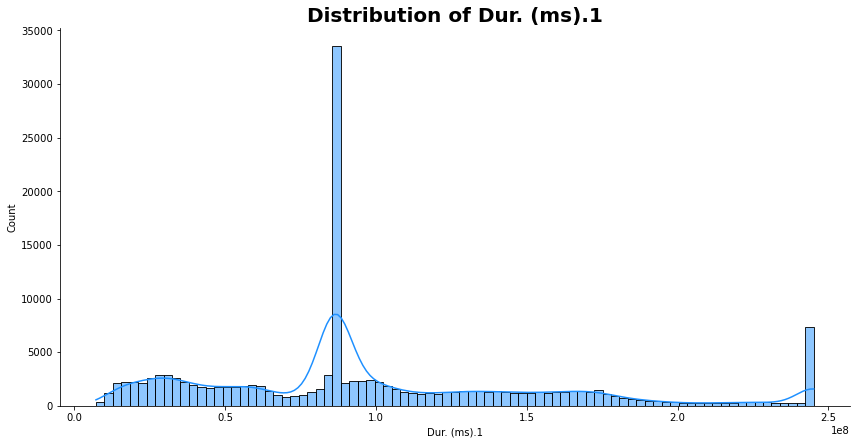

In [41]:
plot_hist(clean_data, 'Dur. (ms).1', 'dodgerblue')

### Social Media Data Volume (Bytes)

In [44]:
clean_data[['Social Media Data Volume (Bytes)']].describe()

,Social Media Data Volume (Bytes)
count,1.468870e+05
mean,1.827736e+06
std,1.035571e+06
min,1.563000e+03
25%,9.313390e+05
50%,1.825390e+06
75%,2.727156e+06
max,3.650861e+06


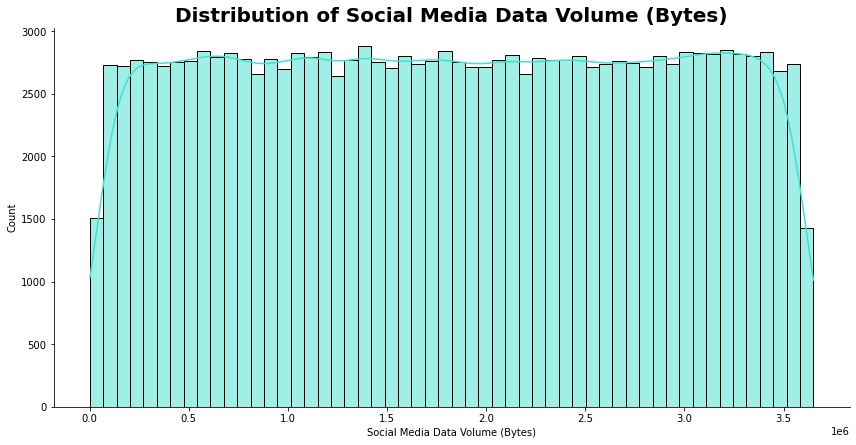

In [48]:
plot_hist(clean_data, 'Social Media Data Volume (Bytes)', '#40E0D0')

### Google Usage Data Volumes (Bytes)

In [49]:
clean_data[['Google Data Volume (Bytes)']].describe()

,Google Data Volume (Bytes)
count,1.468870e+05
mean,7.807976e+06
std,3.517132e+06
min,4.033000e+04
25%,4.943585e+06
50%,7.815531e+06
75%,1.068314e+07
max,1.552878e+07


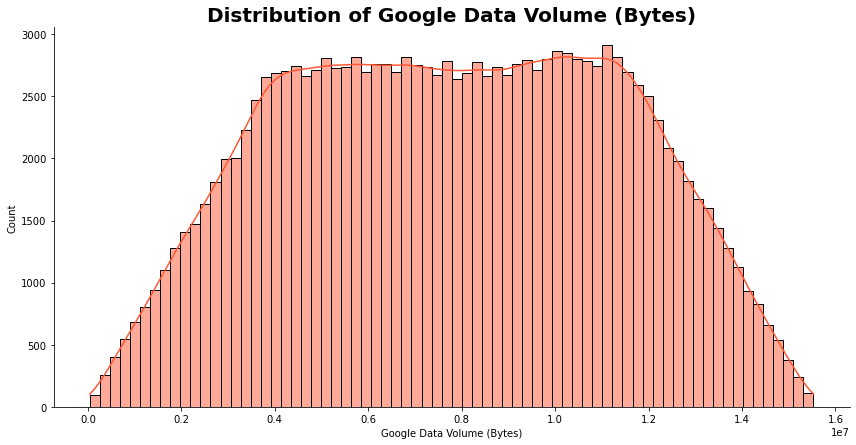

In [53]:
plot_hist(clean_data, 'Google Data Volume (Bytes)', '#FF5733')

### Email Usage Data Volumes (Bytes)

In [54]:
clean_data[['Email Data Volume (Bytes)']].describe()

,Email Data Volume (Bytes)
count,1.468870e+05
mean,2.259087e+06
std,1.071133e+06
min,8.359000e+03
25%,1.359012e+06
50%,2.263890e+06
75%,3.159616e+06
max,4.518036e+06


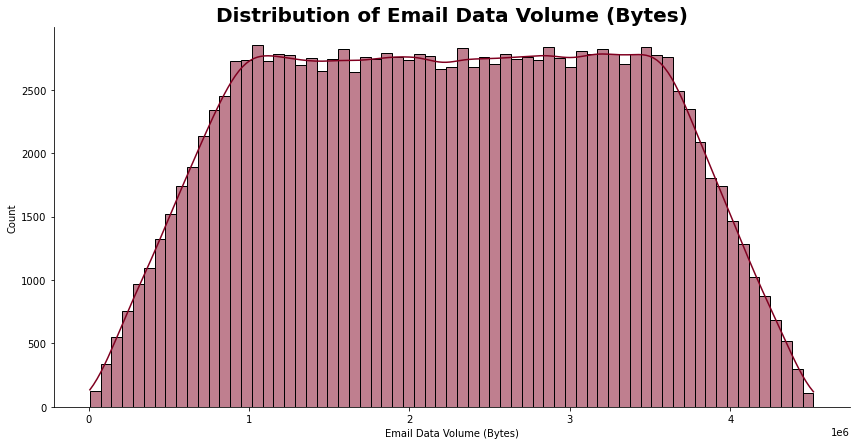

In [56]:
plot_hist(clean_data, 'Email Data Volume (Bytes)', '#800020')

### Youtube Usage Data Volumes (Bytes)

In [57]:
clean_data[['Youtube Data Volume (Bytes)']].describe()

,Youtube Data Volume (Bytes)
count,1.468870e+05
mean,2.264198e+07
std,9.244659e+06
min,1.296550e+05
25%,1.599692e+07
50%,2.266341e+07
75%,2.929351e+07
max,4.519008e+07


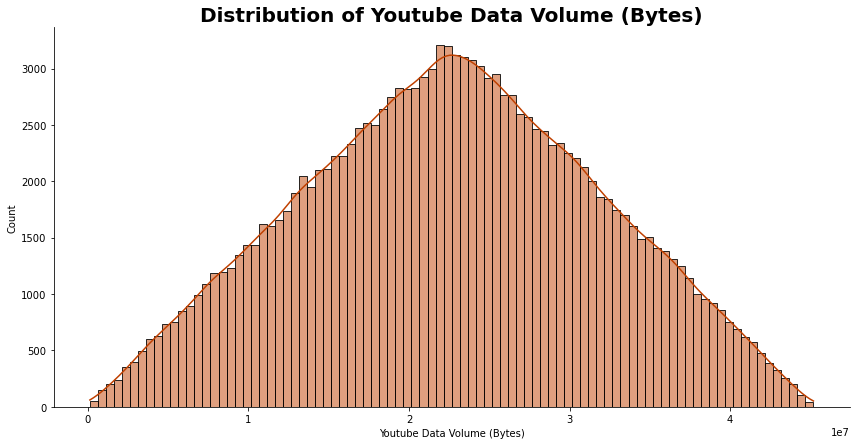

In [58]:
plot_hist(clean_data, 'Youtube Data Volume (Bytes)', '#C04000')

### Netflix Usage Data Volumes (Bytes)

In [59]:
clean_data[['Netflix Data Volume (Bytes)']].describe()

,Netflix Data Volume (Bytes)
count,1.468870e+05
mean,2.262923e+07
std,9.259113e+06
min,9.843200e+04
25%,1.598200e+07
50%,2.263459e+07
75%,2.928806e+07
max,4.519815e+07


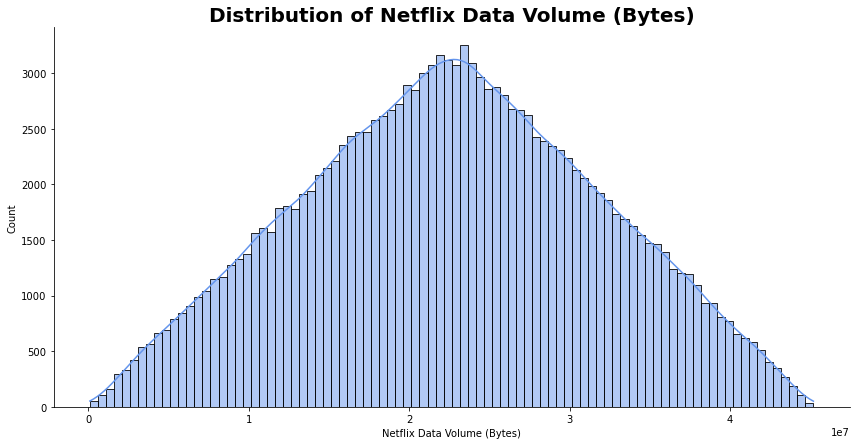

In [60]:
plot_hist(clean_data, 'Netflix Data Volume (Bytes)')

### Data Volumes Due to Gaming (Bytes)

In [61]:
clean_data[['Gaming Data Volume (Bytes)']].describe()

,Gaming Data Volume (Bytes)
count,1.468870e+05
mean,4.303526e+08
std,2.440925e+08
min,3.063580e+05
25%,2.186904e+08
50%,4.316603e+08
75%,6.415752e+08
max,8.592028e+08


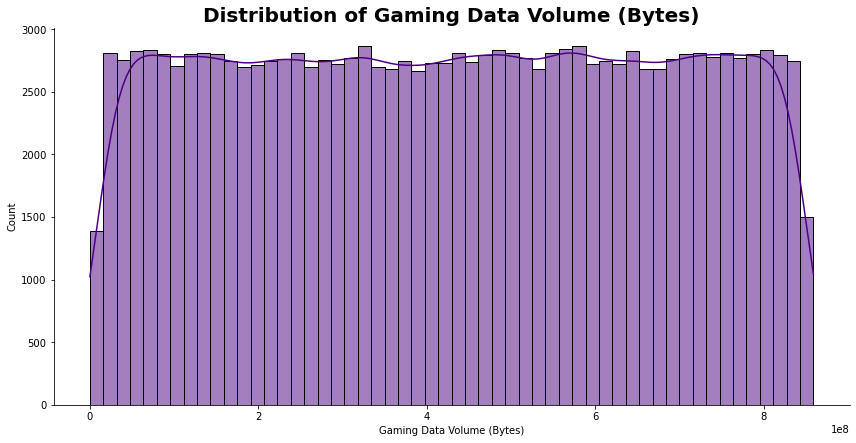

In [65]:
plot_hist(clean_data, 'Gaming Data Volume (Bytes)', 'indigo')

### Other Data Volume (Bytes)

In [66]:
clean_data[['Other Data Volume (Bytes)']].describe()

,Other Data Volume (Bytes)
count,1.468870e+05
mean,4.292669e+08
std,2.432060e+08
min,1.490450e+05
25%,2.184772e+08
50%,4.297978e+08
75%,6.396625e+08
max,8.595209e+08


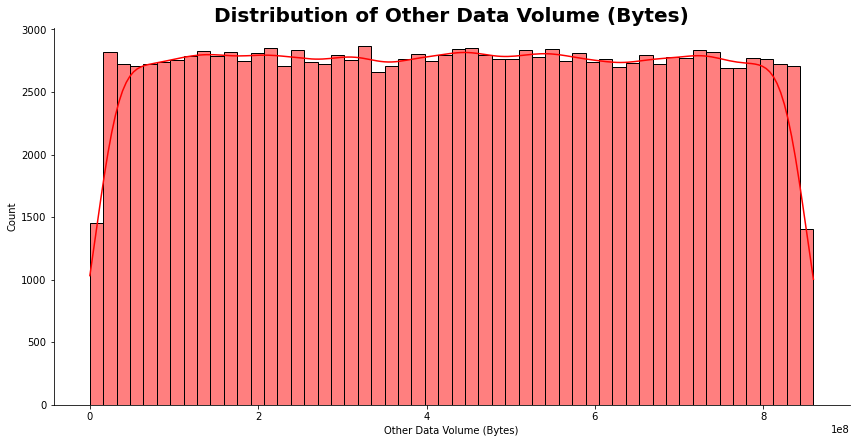

In [68]:
plot_hist(clean_data, 'Other Data Volume (Bytes)', 'red')

### Total Data Volumes (Bytes

In [69]:
clean_data[['Total Data Volume (Bytes)']].describe()

,Total Data Volume (Bytes)
count,1.468870e+05
mean,4.957815e+08
std,2.444434e+08
min,2.895611e+07
25%,2.844777e+08
50%,4.969362e+08
75%,7.066379e+08
max,9.536316e+08


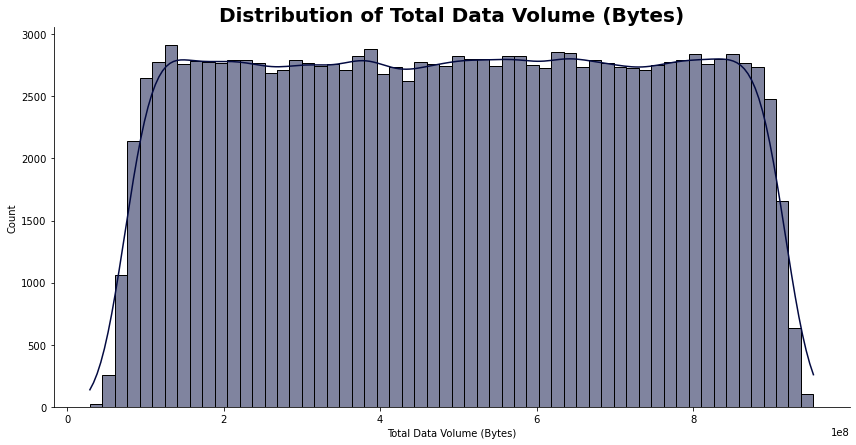

In [72]:
plot_hist(clean_data, 'Total Data Volume (Bytes)', '#030A41')

### Univariate analysis of categorical variables

### Plot a general overview of data

### Transform numerical variables into categorical variables

### Relationship between two continuous variables

### Relationship between two categorical variables and one continuous variable

### Relationship between continuous variables and one categorical variable